# Banking Classification With Logistic Regression

## About Dataset

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed (**yes**) or not (**no**) subscribed.

This dataset contains two main files:

1. **train.csv**: This file contains **32950** rows with **16** features, including the target features. This data spans from May 2008 to November 2010.
2. **test.csv**: This file includes **8238** rows with **13** features, excluding the target feature. The test data is already undergone preprocessing.

## Source

This dataset is available in Kaggle in the following Link:
> https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification/data

## Data Dictionary

* **age**: This is a numeric feature. This feature contains age of a person.
* **job**: This is a categorical feature. This feature contains type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* **marital**: This is a categorical feature. This feature contains marital status of a person. ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed).
* **education**: This is a categorical feature. This feature contains education level of a person ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* **default**: This is a categorical feature. This features contains whether the parson has credit in default? ('no','yes','unknown')
* **housing**: This is a categorical feature. This feature contains whether the person has housing loan?
* **loan**: This is a categorical feature. This feature contains whether the person has personal loan?
* **contact**: This is a categorical feature. This feature contains contact communication type of a person ('cellular','telephone')
* **month**: This is a categorical(ordinal) feature. This feature contains last contact month of year with the person('jan', 'feb', 'mar', …, 'nov', 'dec')
* **day_of_week**: This is a categorical(ordinal) feature. This feature contains last contact day of the week with the person('mon','tue','wed','thu','fri')
* **duration**: This is a numeric feature. This feature contains last contact duration, in seconds.
* **campaign**: This is a numeric feature. This feature contains number of contacts performed during this campaign and for this client (includes last contact)
* **pdays**: This is a numeric feature. This feature contains number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
* **previous**: This is a numeric feature. This feature contains number of contacts performed before this campaign and for this client.
* **poutcome**: This is a categorical feature. This feature contains outcome of the previous marketing campaign with  a person('failure','nonexistent','success')
* **y**: This is the target feature(binary). This feature has the client subscribed a term deposit? ('yes','no').

## Problem Statements

1. **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the training dataset to uncover the patterns and relationships that might influence long term deposit at bank.
2. **Preprocessing & Cleaning**: Clean the data by removeing or handling missing values, removing outliers and duplicate rows.

### Load Necessary Libraries

In [81]:
# General Purpose Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Preporcessing Libraries
from sklearn.ensemble import IsolationForest
import ppscore as pps


### Settings

In [2]:
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

### Load Dataset

In [82]:
df = pd.read_csv("new_train.csv")

### General Information

In [4]:
# Show 1st 5 rows to get the idea about the training data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [5]:
# Data Description
print(f"Number of observations(rows): {df.shape[0]}")
print(f"Number of features(columns): {df.shape[1]}")

Number of observations(rows): 32950
Number of features(columns): 16


In [6]:
# Datatypes of Features
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [42]:
# Information about Categorical and Numerical Features
num_cols = [col for col in df.columns if df[col].dtype != "object"]
cat_cols = [col for col in df.columns if df[col].dtype == "object"]

print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(f"Number of Numerical Features: {len(num_cols)}")
print(num_cols)
print("-" * 60)
print(f"Number of Categorical Features: {len(cat_cols)}")
print(cat_cols)
print("-" * 60)

FEATURE DESCRIPTION
Number of Numerical Features: 5
['age', 'duration', 'campaign', 'pdays', 'previous']
------------------------------------------------------------
Number of Categorical Features: 11
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
------------------------------------------------------------


In [8]:
# Check Duplicate Rows
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 8


### Key Findings

There are **8** duplicate rows in the dataset.

In [9]:
# Check presence of Missing or Null values in any feature in the dataset
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() == 0:
    print("There is no missing values in any feature in this dataset.")
else:
    print(df.isnull().sum())

MISSING VALUE DETECTION
There is no missing values in any feature in this dataset.


### Univariate Feature Analysis

In [10]:
# Statistical Summary of Numerical Features
# This summary gives us a rough idea abount distribution of values in each numerical feature.
print("=" * 60)
print("STATISTICAL SUMMARY OF NUMERICAL FEATURES")
print("=" * 60)
for col in num_cols:
    print(f"Feature:   {col}")
    print(f"Mean: {df[col].mean(): 0.2f}")
    print(f"Median: {df[col].median(): 0.2f}")
    print(f"Standard Deviation: {df[col].std(): 0.2f}")
    print(f"Range: {df[col].min(): 0.2f} - {df[col].max(): 0.2f}")
    print("-" * 60)
    

STATISTICAL SUMMARY OF NUMERICAL FEATURES
Feature:   age
Mean:  40.01
Median:  38.00
Standard Deviation:  10.40
Range:  17.00 -  98.00
------------------------------------------------------------
Feature:   duration
Mean:  258.13
Median:  180.00
Standard Deviation:  258.98
Range:  0.00 -  4918.00
------------------------------------------------------------
Feature:   campaign
Mean:  2.56
Median:  2.00
Standard Deviation:  2.75
Range:  1.00 -  56.00
------------------------------------------------------------
Feature:   pdays
Mean:  962.05
Median:  999.00
Standard Deviation:  187.95
Range:  0.00 -  999.00
------------------------------------------------------------
Feature:   previous
Mean:  0.17
Median:  0.00
Standard Deviation:  0.50
Range:  0.00 -  7.00
------------------------------------------------------------


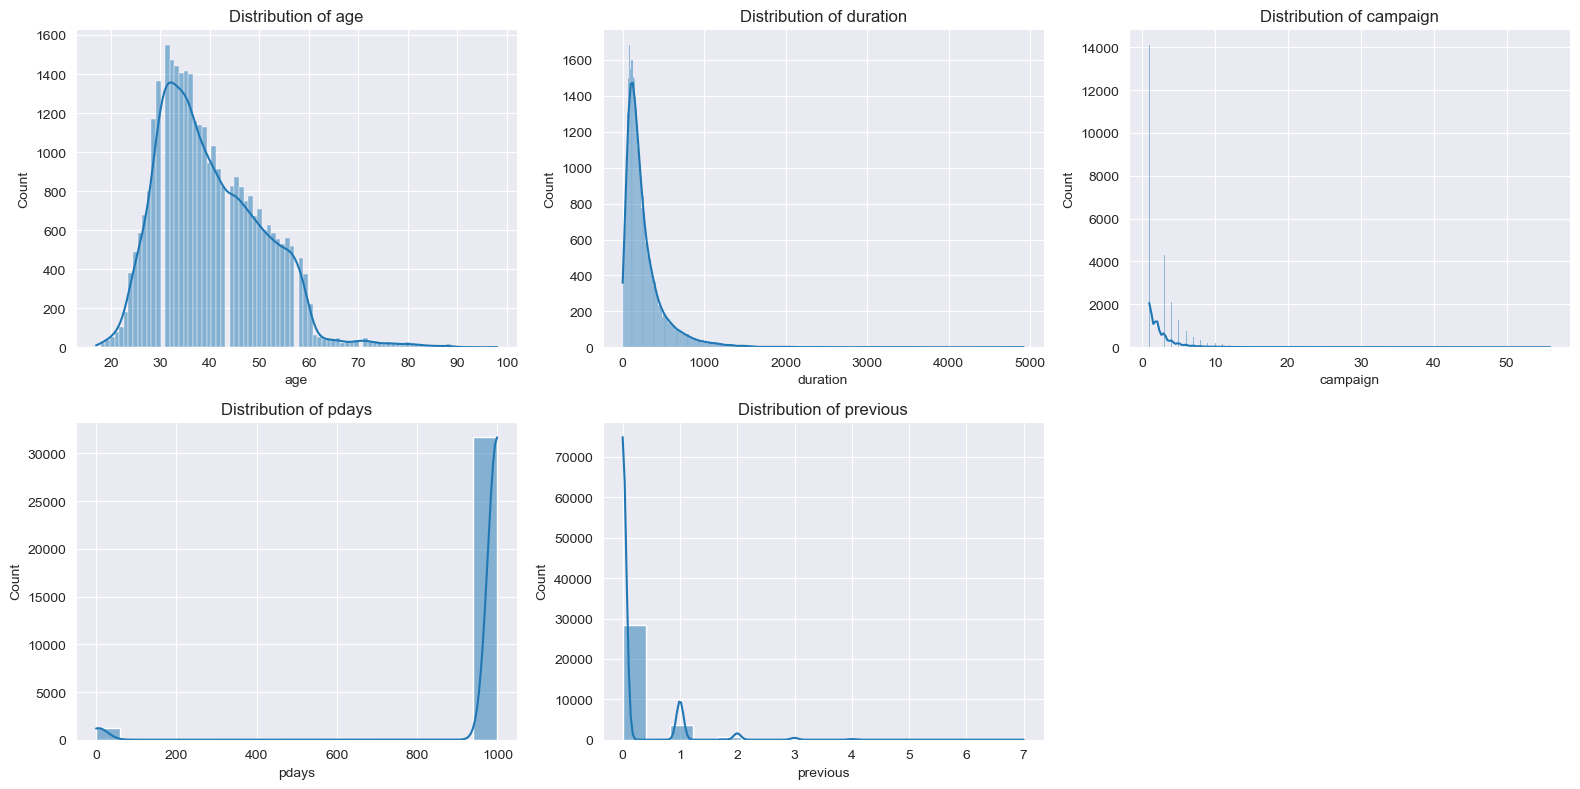

In [11]:
# Visualize the distribution of each numerical features
# Histogram analysis helps us to visually distinguish the distribution of each numerical feature.

fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data= df, x= col, kde=True, ax= axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
axes[-1].axis("off")
plt.show()
    

### Key Findings

* **Age** is slightly right skewed after **60** years which indicates high frequency for younger persons.
* **Last contact duration(in seconds)** is right skewed after **600** seconds which inidicates duration of call is lower for most of the persons.
* Most of the **pdays** values is 999 which indicates most of the persons has not been contacted in the last campaign.
* Most of the **pday** is 0 which indicates no contact has been made before campaign.
* Most of the **campaign** is below **10** which inicates most of the persons were contacted during the campaign less than 10 times.

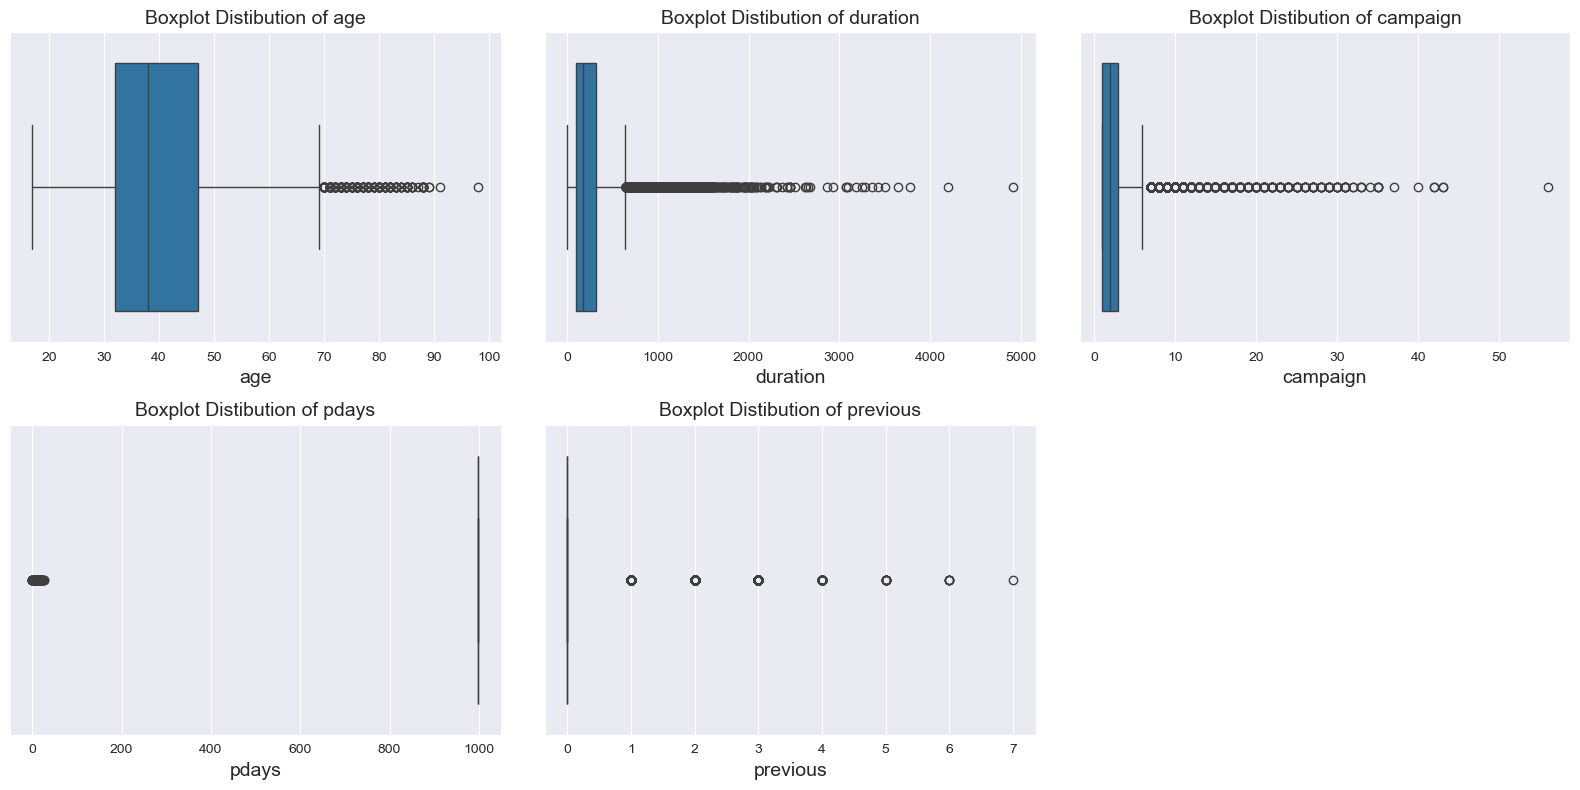

In [12]:
# Boxplot Visualization of nummeric features to find the presence of outliers in each feature

fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data= df, x = col, ax= axes[i])
    axes[i].set_title(f"Boxplot Distibution of {col}", fontsize= 14)
    axes[i].set_xlabel(f"{col}", fontsize= 14)

plt.tight_layout()
axes[-1].axis("off")
plt.show()

In [13]:
# Detect presence of outliers in the dataset with an ensemble model IsolationForest
iso = IsolationForest(contamination= 0.1, random_state= 42)
iso.fit(df[num_cols])

IsolationForest(contamination=0.1, random_state=42)

In [14]:
# Predict Outliers(-1  is outlier, 1 is inlier)
df_o = df.copy()
df_o["Outlier"] = iso.predict(df_o[num_cols])
outliers = df_o[df_o["Outlier"] == -1].shape[0]
print(f"Number of outlier observarion in this dataset are {outliers}")

Number of outlier observarion in this dataset are 3295


In [56]:
df["y"].value_counts()

y
no     29238
yes     3712
Name: count, dtype: int64

In [58]:
df_o[df_o["Outlier"] == -1]["y"].value_counts()

y
no     1901
yes    1394
Name: count, dtype: int64

### Key Findings

* From Boxplot analysis it is found that all the numerical features have outliers avove their upper limit.
* From Isolation Forest prediction it is found that **3295** observations are outliers for this dataset.

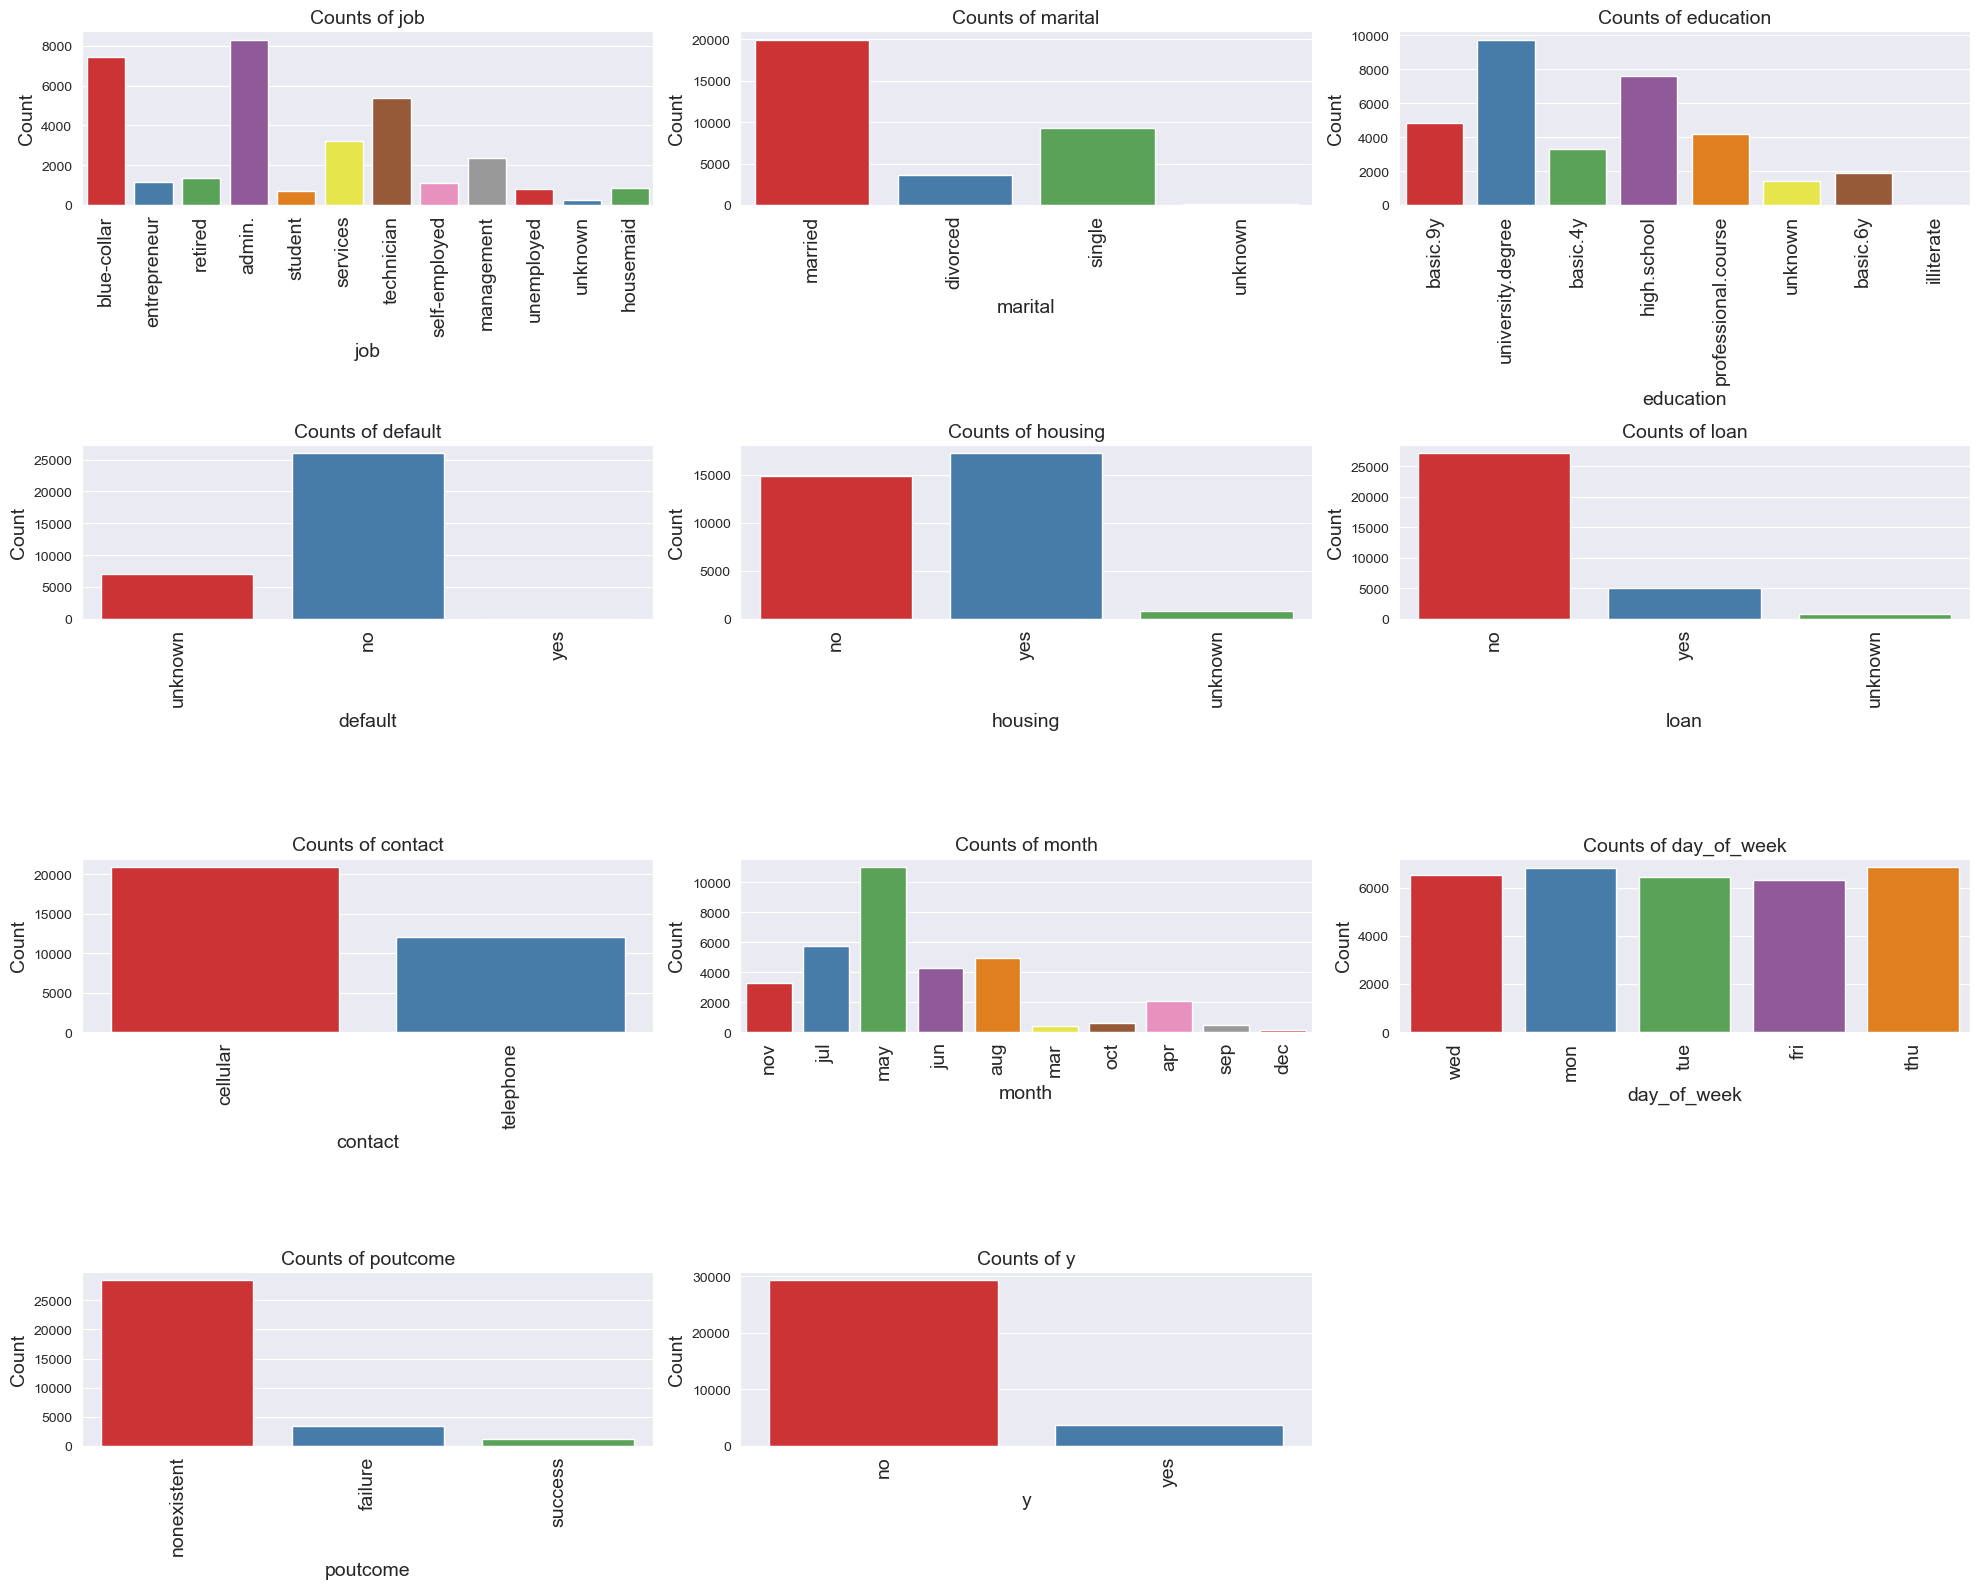

In [31]:
# Visualize tthe counts of each categorical features so that we can understand
# the proportion of each unique category of the features

fig, axes = plt.subplots(nrows= 4, ncols= 3, figsize=(20,16))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data= df, x= col, hue= col, palette="Set1", ax = axes[i])
    axes[i].set_title(f"Counts of {col}", fontsize=14)
    axes[i].set_xlabel(f"{col}", fontsize= 14)
    axes[i].set_ylabel("Count", fontsize= 14)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, fontsize= 14)

plt.tight_layout()
axes[-1].axis("off")
plt.show()

### Key Findings

* **Job** of most of the person in this observations are **admin**.
* Most of the **married** persons are present in this observation.
* **Education level** of most of the person are **university degree**.
* Most of the person in this observation don't have any **credit or loan**(default)
* Proportion of having and not having **housing loan**(housing) are almost same.
* Most of the person in this observation don't have any **personal loan**(loan)
* Communication type of most obf the observation are **cellular**(contacts)
* Most of the person were contacted in the month of **May**(month)
* Contacts are almost same for all **week days**(day_of_week)
* Success rate is very poor in last campaign.
* Most of the clients didn't subscribed for term deposit in the last campaign. So This classification data is very much **imbalanced**(y)

### Correlation Analysis

This correlation analysis helps us to find the relationship among the independent numerical features. It also finds the relationship of of numerical features with the target.

In [46]:
# Append the target in numerical feature list
num_cols_t = num_cols + list("y")
df_corr = df[num_cols_t] 
# Encode the target y to numeric with map
df_corr["y"] = df_corr["y"].map({"yes": 1, "no": 0})
df_corr
# Find Pearson's correlation to check linear correlation
corr = df_corr.corr().round(2)
corr

,age,duration,campaign,pdays,previous,y
age,1.00,-0.00,0.00,-0.03,0.02,0.03
duration,-0.00,1.00,-0.08,-0.05,0.02,0.40
campaign,0.00,-0.08,1.00,0.05,-0.08,-0.07
pdays,-0.03,-0.05,0.05,1.00,-0.59,-0.33
previous,0.02,0.02,-0.08,-0.59,1.00,0.23
y,0.03,0.40,-0.07,-0.33,0.23,1.00


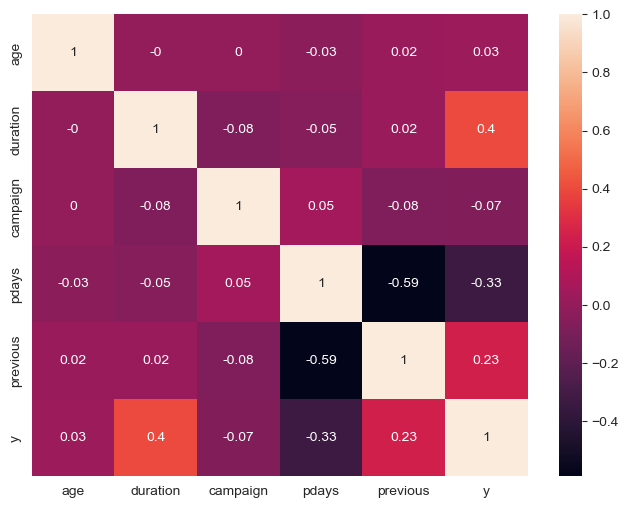

In [51]:
# Plot heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(data= corr, annot=True)
plt.show()

In [55]:
# Find Predictive Power Score to check nonlinear correlationamong the all features numerical as well as categorical.

pps_matrix = pps.matrix(df)
pps_matrix[(pps_matrix["x"] != pps_matrix["y"]) & (pps_matrix["ppscore"] > 0.4)]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
135,month,contact,0.553715,classification,True,weighted F1,0.530000,0.790246,DecisionTreeClassifier()
222,previous,poutcome,0.794807,classification,True,weighted F1,0.804096,0.959802,DecisionTreeClassifier()
236,poutcome,pdays,0.769459,regression,True,mean absolute error,36.545800,8.425291,DecisionTreeRegressor()
237,poutcome,previous,0.672562,regression,True,mean absolute error,0.174200,0.057040,DecisionTreeRegressor()


### Key Findings

* From Pearson's correlation analysis it is found that previous and pdays has negetive modarate correlation.
* From Pearson's correlation analysis it is found that duration and y(target) has positive modarate correlation.
* From Pearson's correlation analysis it is found that pdays and y(target) has negetive modarate correlation.
* From Predictive Power Score analysis it is found poutcome has very strong non-linear correlation with previous and pdays.
* From Predictive Power Score analysis it is found contact and month has strong non-linear correlation.

### Data Preprocessing and Cleaning

In [85]:
# Remove unnecessary features
# From histogram analysis we found pdays contains 999 mostly so we remove this feature
# From histogram analysis we found previous contains 0 mostly so we remove this feature

df.drop(["previous", "pdays"], axis= 1, inplace= True)

In [86]:
# Remove Duplicate Rows
df = df.drop_duplicates()

In [87]:
# Sanity Check
df.shape

(32942, 14)

In [88]:
# Save the dataset without duplicates
df.to_csv("train_wo_dup.csv", index= False)

In [89]:
# Remove those outlier row which have target "no". 

# Get index of outliers which have target "no"
o_indexes = df_o[(df_o["Outlier"]== -1) & (df_o["y"]== "no")].index
df_no = df.drop(o_indexes, axis=0).reset_index()

In [90]:
# Sanity check
df_no.shape

(31041, 15)

In [91]:
# Save the dataset without "no" outlier
df_no.to_csv("train_wo_no.csv", index= False)

In [92]:
# Remove all outliers

# Get index having outliers
o_indexes = df_o[df_o["Outlier"]== -1].index
df_wo_out = df.drop(o_indexes, axis= 0).reset_index()

In [93]:
# Save the dataset without any outlier row
df_wo_out.to_csv("train_wo_out.csv", index= False)